In [62]:
import json
import math

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


def plot_exec(values, title, filename, radius, tickslist, data=None):

    # change time from s to ms
    values_ms = [round(d * 1000, 5) for d in values]

    stat = {}

    in_range     = [v for v in values_ms if abs(v) < radius]

    stat['out_radius'] = len([v for v in values_ms if abs(v) >= radius])
    stat['in_radius'] = [v for v in values_ms if abs(v) < radius]
    stat['in_aim']    = len([v for v in values_ms if abs(v) <= 0.1])

    stat['out_radius_pct'] = '100'
    stat['in_aim_pct']     = '0'

    if len(values_ms) != 0:
        stat['out_radius_pct'] = round(stat['out_radius'] / len(values_ms) * 100, 1)
        stat['in_aim_pct']     = round(stat['in_aim'] / len(values_ms) * 100, 1)

    plt.clf()
    plt.rcParams.update({'font.size': 18})

    # the position of this code right here is important
    ax = plt.figure().gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.axvspan(-0.1, 0.1, facecolor='#00ff00', alpha=0.25)
    plt.rcParams.update({'figure.figsize':(18, 12), 'figure.dpi':80})
    
    # the histogram of the data
    bins = np.linspace(-radius, radius, 401)
    n, bins, patches = plt.hist(in_range, bins=bins, facecolor='#123456')

    plt.title(title + '\n ', loc='left')

    pad = '                              '

    title  = f'{pad}outside [-{radius}, +{radius}]: {stat["out_radius"]} = {stat["out_radius_pct"]}%'
    title += f'\n{pad}inside aim :         {stat["in_aim"]} = {stat["in_aim_pct"]}%'
    # title += f'\n{pad}inside aim :         {stat["in_aim"]}%'
    # plt.title(title, multialignment='left', loc='left')
    plt.title(title, loc='center', multialignment='left')

    plt.xlabel('Difference: (dug-seis − reference) [ms]')
    plt.ylabel('Number of picks')
#     plt.xticks(range(-radius, radius, 1))
#     plt.xticks([i / 10 for i in range(-40, 40, 5)])
    plt.xticks([i / 100 for i in range(-20, 20, 5)])
    
#     plt.xticks(tickslist)

    # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')

    # Das funktioniert, erzeugt aber eine deprecation warning.
#     ax = plt.axes()
#     ax.set_axisbelow(True)

    plt.xlim(-radius, radius)
    plt.ylim(0, max(n) + 1)
    plt.grid(True)
    if data is not None: 
        stat_info(plt, data)

#    plt.savefig(filename, dpi=300)


def stat_info(plt, data):
    plt.subplots_adjust(bottom=0.35)

    col1 = 0.1
    col2 = 0.3
    col3 = 0.5

    row1 = 0.22
    rowheight = 0.045

    plt.gcf().text(col1, row1 - rowheight * 0, 'max_diff')
    plt.gcf().text(col1, row1 - rowheight * 1, 'OK')
    plt.gcf().text(col1, row1 - rowheight * 2, 'OK percentage')
    plt.gcf().text(col1, row1 - rowheight * 3, 'missed')
    plt.gcf().text(col1, row1 - rowheight * 4, 'false')

    plt.gcf().text(col2, row1 - rowheight * 0, str(round(data['max_diff'] * 1000, 5)) + ' ms')
    plt.gcf().text(col2, row1 - rowheight * 1, data['OK'])
    plt.gcf().text(col2, row1 - rowheight * 2, data['ok_percentage'])
    plt.gcf().text(col2, row1 - rowheight * 3, data['missed'])
    plt.gcf().text(col2, row1 - rowheight * 4, data['false'])


In [63]:
cfg = {
    'results':  '/home/1/dev/proj/dugseis/devel/processing/analysis/p_picker/output/' + \
                 f'12-sourcefiles/',
#                  f'{sys.argv[5]}-sourcefiles/',
    'param_str': '3.0_1.5_7_180',
}
cfg['results'] = cfg['results'] + cfg['param_str'] + '/'

input_file = f'{cfg["results"]}statistic_{cfg["param_str"]}.json'
#input_file

with open(input_file, 'r') as read_file:
    data = json.load(read_file)

all_diffs = []
# radius = 4
# tickslist = range(-radius, radius, 2)
radius = 0.2
tickslist = [i / 100 for i in range(-20, 20, 5)]


In [64]:
#data['diffs']['19']

<Figure size 1440x960 with 0 Axes>

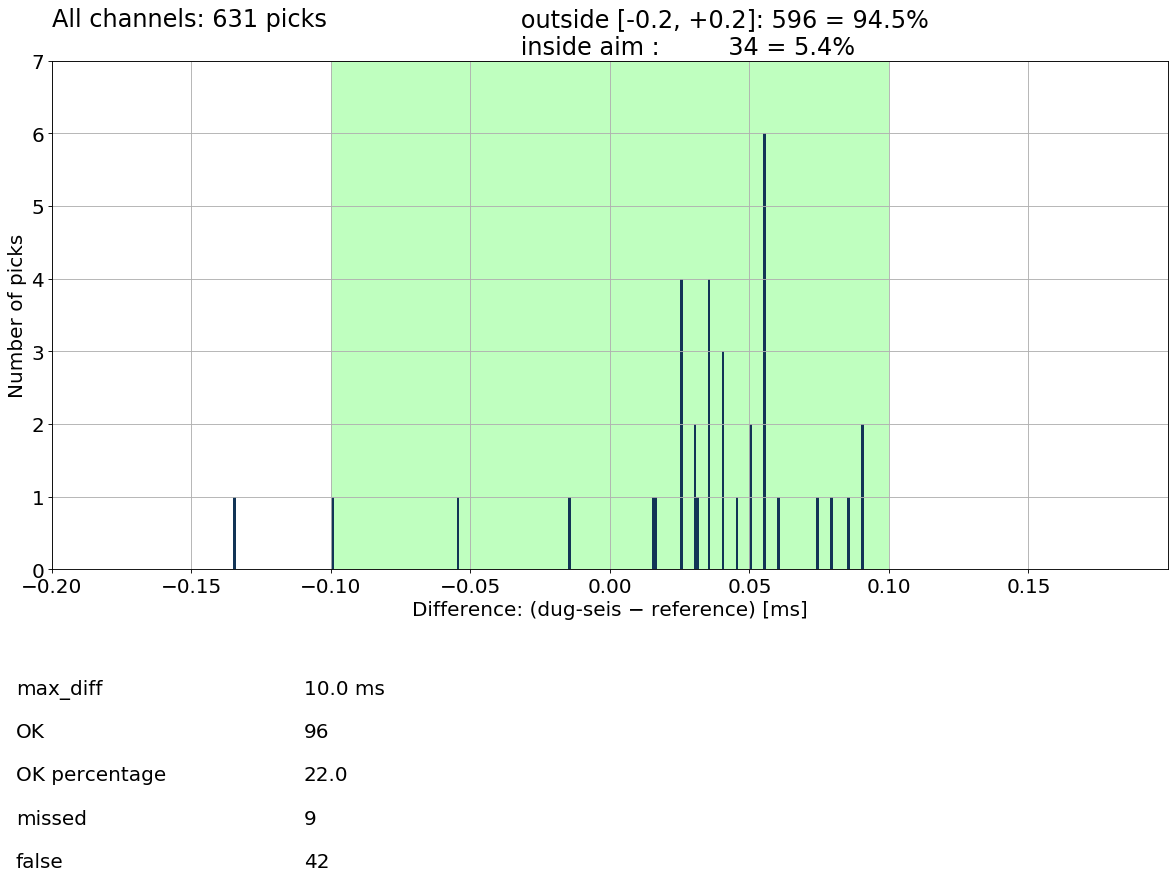

In [65]:
for ch in data['diffs'].keys():
#for ch in ['19']:
    values = data['diffs'][ch]
    all_diffs += values
#     title = f'Channel {ch}: {len(values)}6 pick{"" if len(values) == 1 else "s"}'
#     filename = f'{cfg["results"]}/channel_{ch.zfill(2)}.png'

#     plot_exec(
#         values=values,
#         title=title,
#         filename=filename,
#         radius=radius,
#         tickslist=tickslist,
#     )

if True:
    title = f'All channels: {len(all_diffs)} picks'
    filename = f'{cfg["results"]}/channels_all.png'

    plot_exec(
        values=all_diffs,
        title=title,
        filename=filename,
        radius=radius,
        tickslist=tickslist,
        data=data,
    )
